In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [229]:
df = pd.read_csv("D:\diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [231]:
df.describe()
# Thống kê mô tả về tập dữ liệu

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [232]:
# Drop the "Unnamed: 0" column
df_clean = df.copy()
df_clean = df_clean.drop("Unnamed: 0", axis = 1)

# Preview dataset again
df_clean.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [233]:
missing_values = df_clean.isnull().sum()
missing_percent = (missing_values / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
missing_df

Missing Values  Percentage
carat                 0         0.0
cut                   0         0.0
color                 0         0.0
clarity               0         0.0
depth                 0         0.0
table                 0         0.0
price                 0         0.0
x                     0         0.0
y                     0         0.0
z                     0         0.0

In [234]:
duplicates = df_clean.duplicated().sum()
duplicate_rows = df[df_clean.duplicated(keep=False)]

print("Số lượng dòng trùng lặp:", duplicates)
print("Các dòng trùng lặp:")
print(duplicate_rows)

Số lượng dòng trùng lặp: 146
Các dòng trùng lặp:
       Unnamed: 0  carat    cut color clarity  depth  table  price     x  \
1004         1005   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90   
1005         1006   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90   
1006         1007   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90   
1007         1008   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90   
1008         1009   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90   
...           ...    ...    ...   ...     ...    ...    ...    ...   ...   
49557       49558   0.71   Good     F     SI2   64.1   60.0   2130  0.00   
50078       50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19   
50079       50080   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19   
52860       52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21   
52861       52862   0.50   Fair     E     VS2   79.0   73.0   2579  5.21   

          y     z  
1004   5.85  3.66 

In [235]:
df_clean = df_clean.drop_duplicates()
print(df_clean.shape)

(53794, 10)


In [236]:
df_clean = df_clean.drop(df_clean[df_clean["x"]==0].index)
df_clean = df_clean.drop(df_clean[df_clean["y"]==0].index)
df_clean = df_clean.drop(df_clean[df_clean["z"]==0].index)

df_clean.shape

(53775, 10)

In [237]:
df_Descriptive = df_clean.copy()

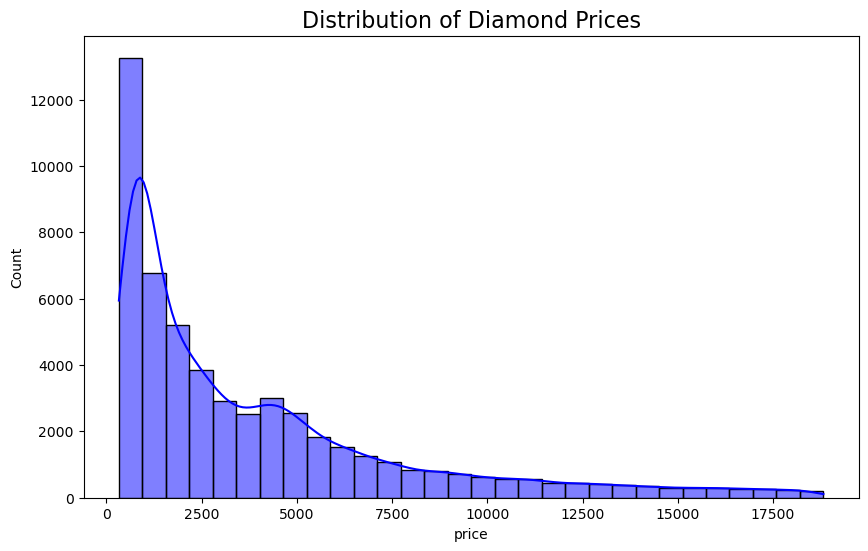

In [238]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Descriptive, x='price', bins=30, kde=True, color="blue")
plt.title("Distribution of Diamond Prices", fontsize=16)
plt.show()

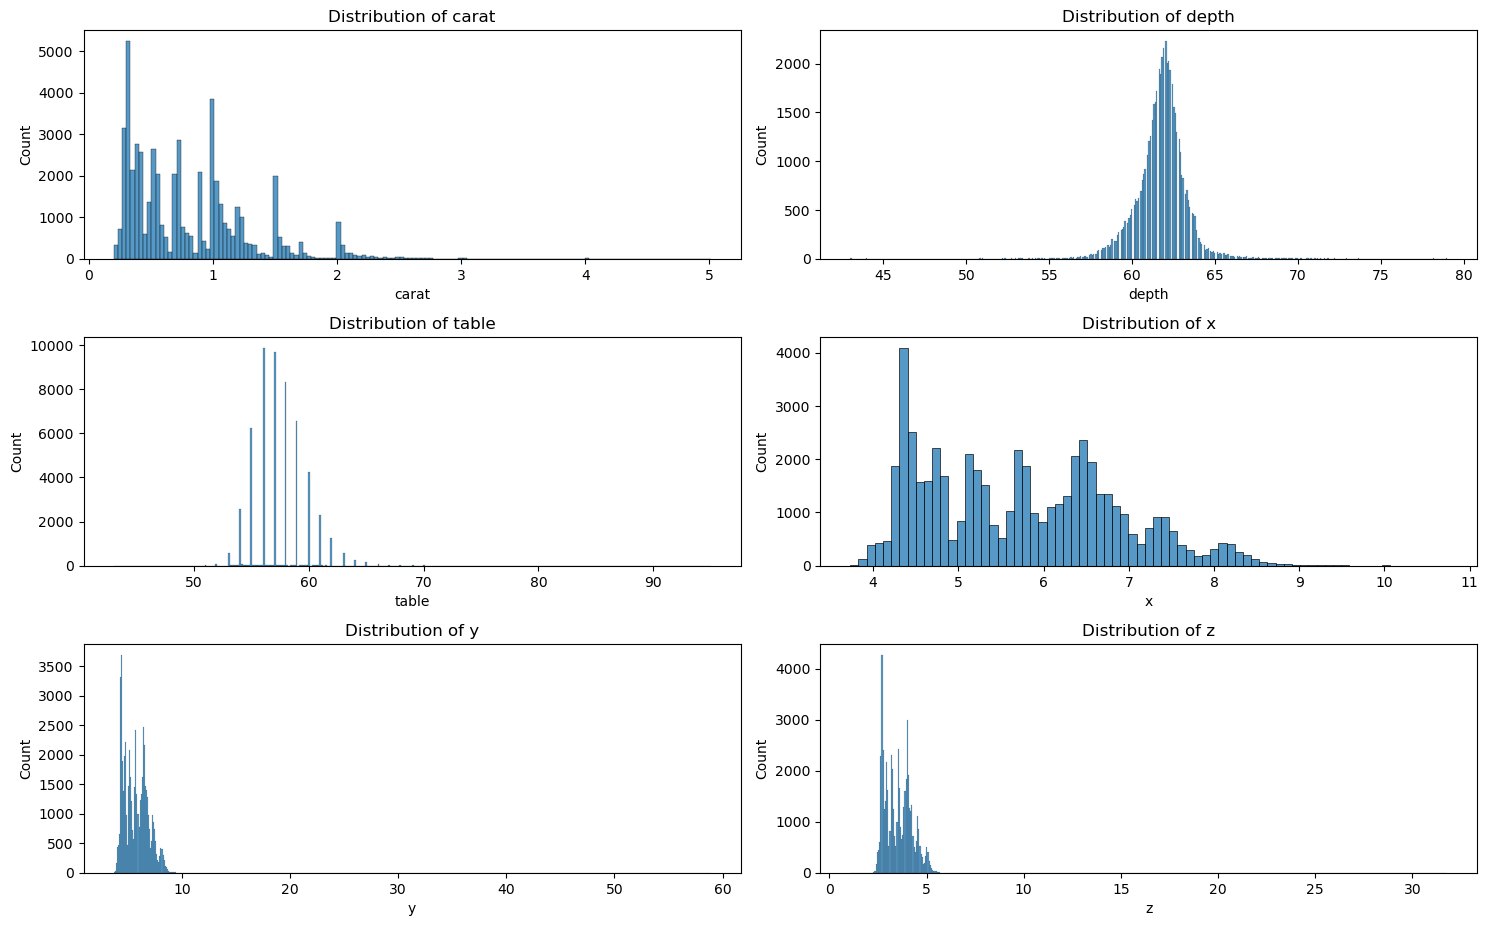

In [239]:
def plot_distributions(df):
    fig, axes = plt.subplots(4, 2, figsize=(15, 12))

    columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

    for i, col in enumerate(columns):
        row, col_idx = divmod(i, 2)  # Chia hàng và cột cho lưới 4x2
        sns.histplot(data=df, x=col, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Distribution of {col}')

    for j in range(len(columns), axes.size):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    return fig

fig = plot_distributions(df_Descriptive)
plt.show()

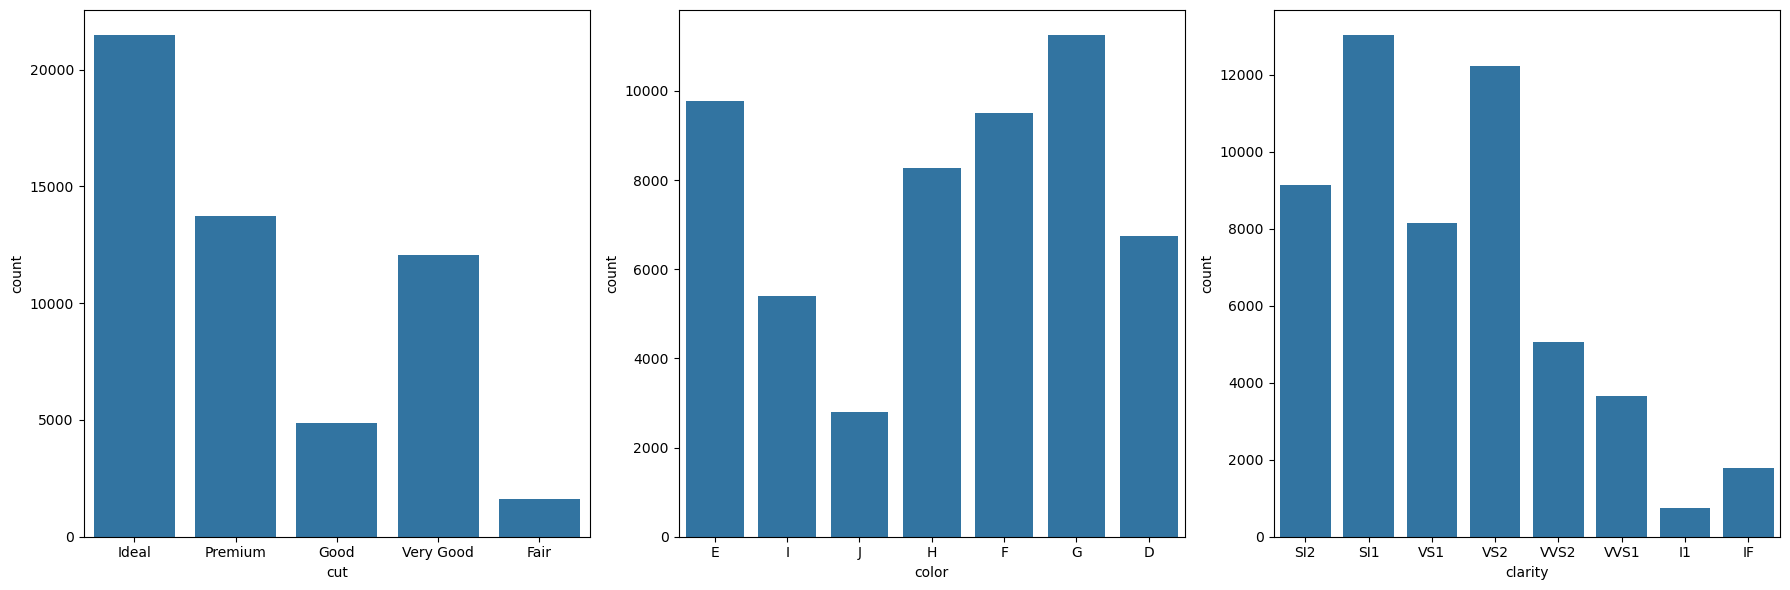

In [240]:
def plot_categorical(df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.countplot(data=df, x='cut', ax=axes[0])
    sns.countplot(data=df, x='color', ax=axes[1])
    sns.countplot(data=df, x='clarity', ax=axes[2])

    plt.tight_layout()
    return fig

fig = plot_categorical(df_Descriptive)
plt.show()

In [241]:
cat_columns = df_Descriptive.select_dtypes(include='object').columns.tolist()
num_columns = df_Descriptive.select_dtypes(include='number').columns.tolist()
num_columns.remove('price')

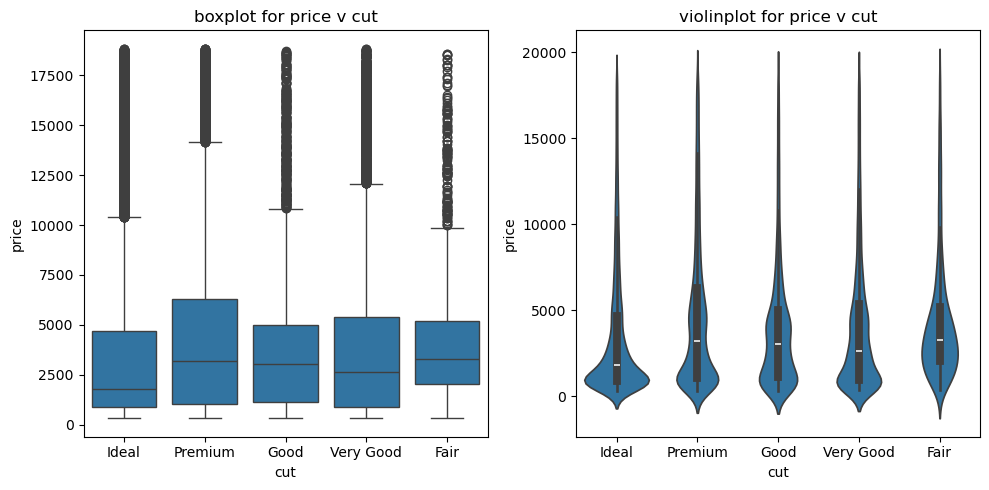

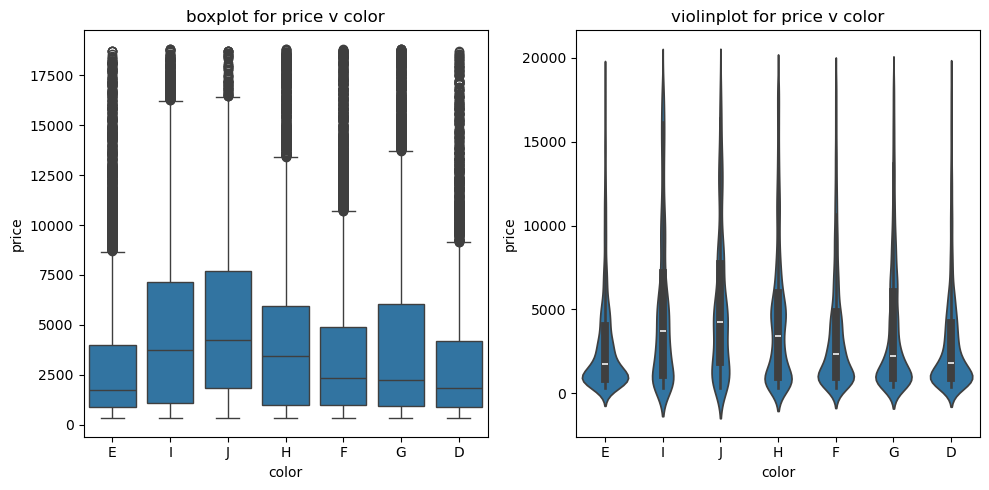

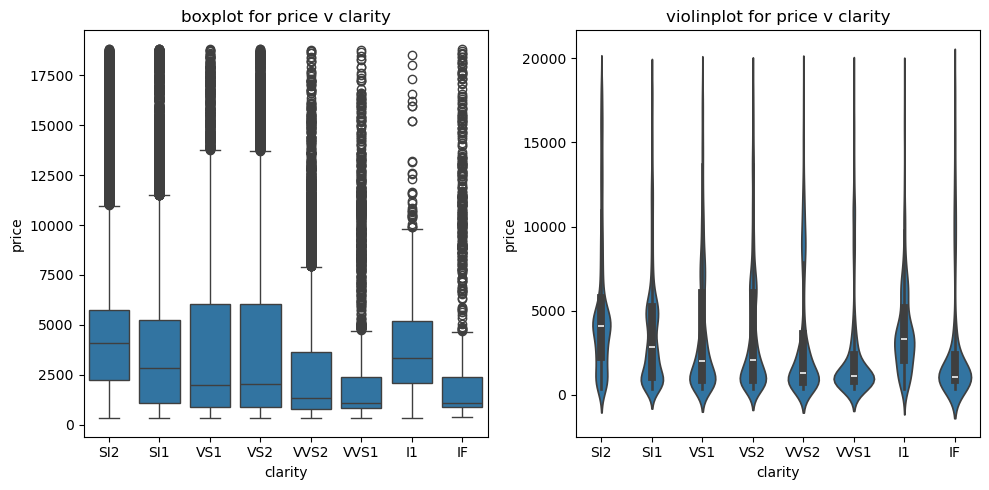

In [242]:
for col in cat_columns:
    plt.figure(figsize=[10,5])

    plt.subplot(1,2,1)
    sns.boxplot(x=col, y='price', data = df_Descriptive)
    plt.title(f'boxplot for price v {col}')

    plt.subplot(1,2,2)
    sns.violinplot(x=col, y='price', data = df_Descriptive)
    plt.title(f'violinplot for price v {col}')

    plt.tight_layout()
    plt.show()

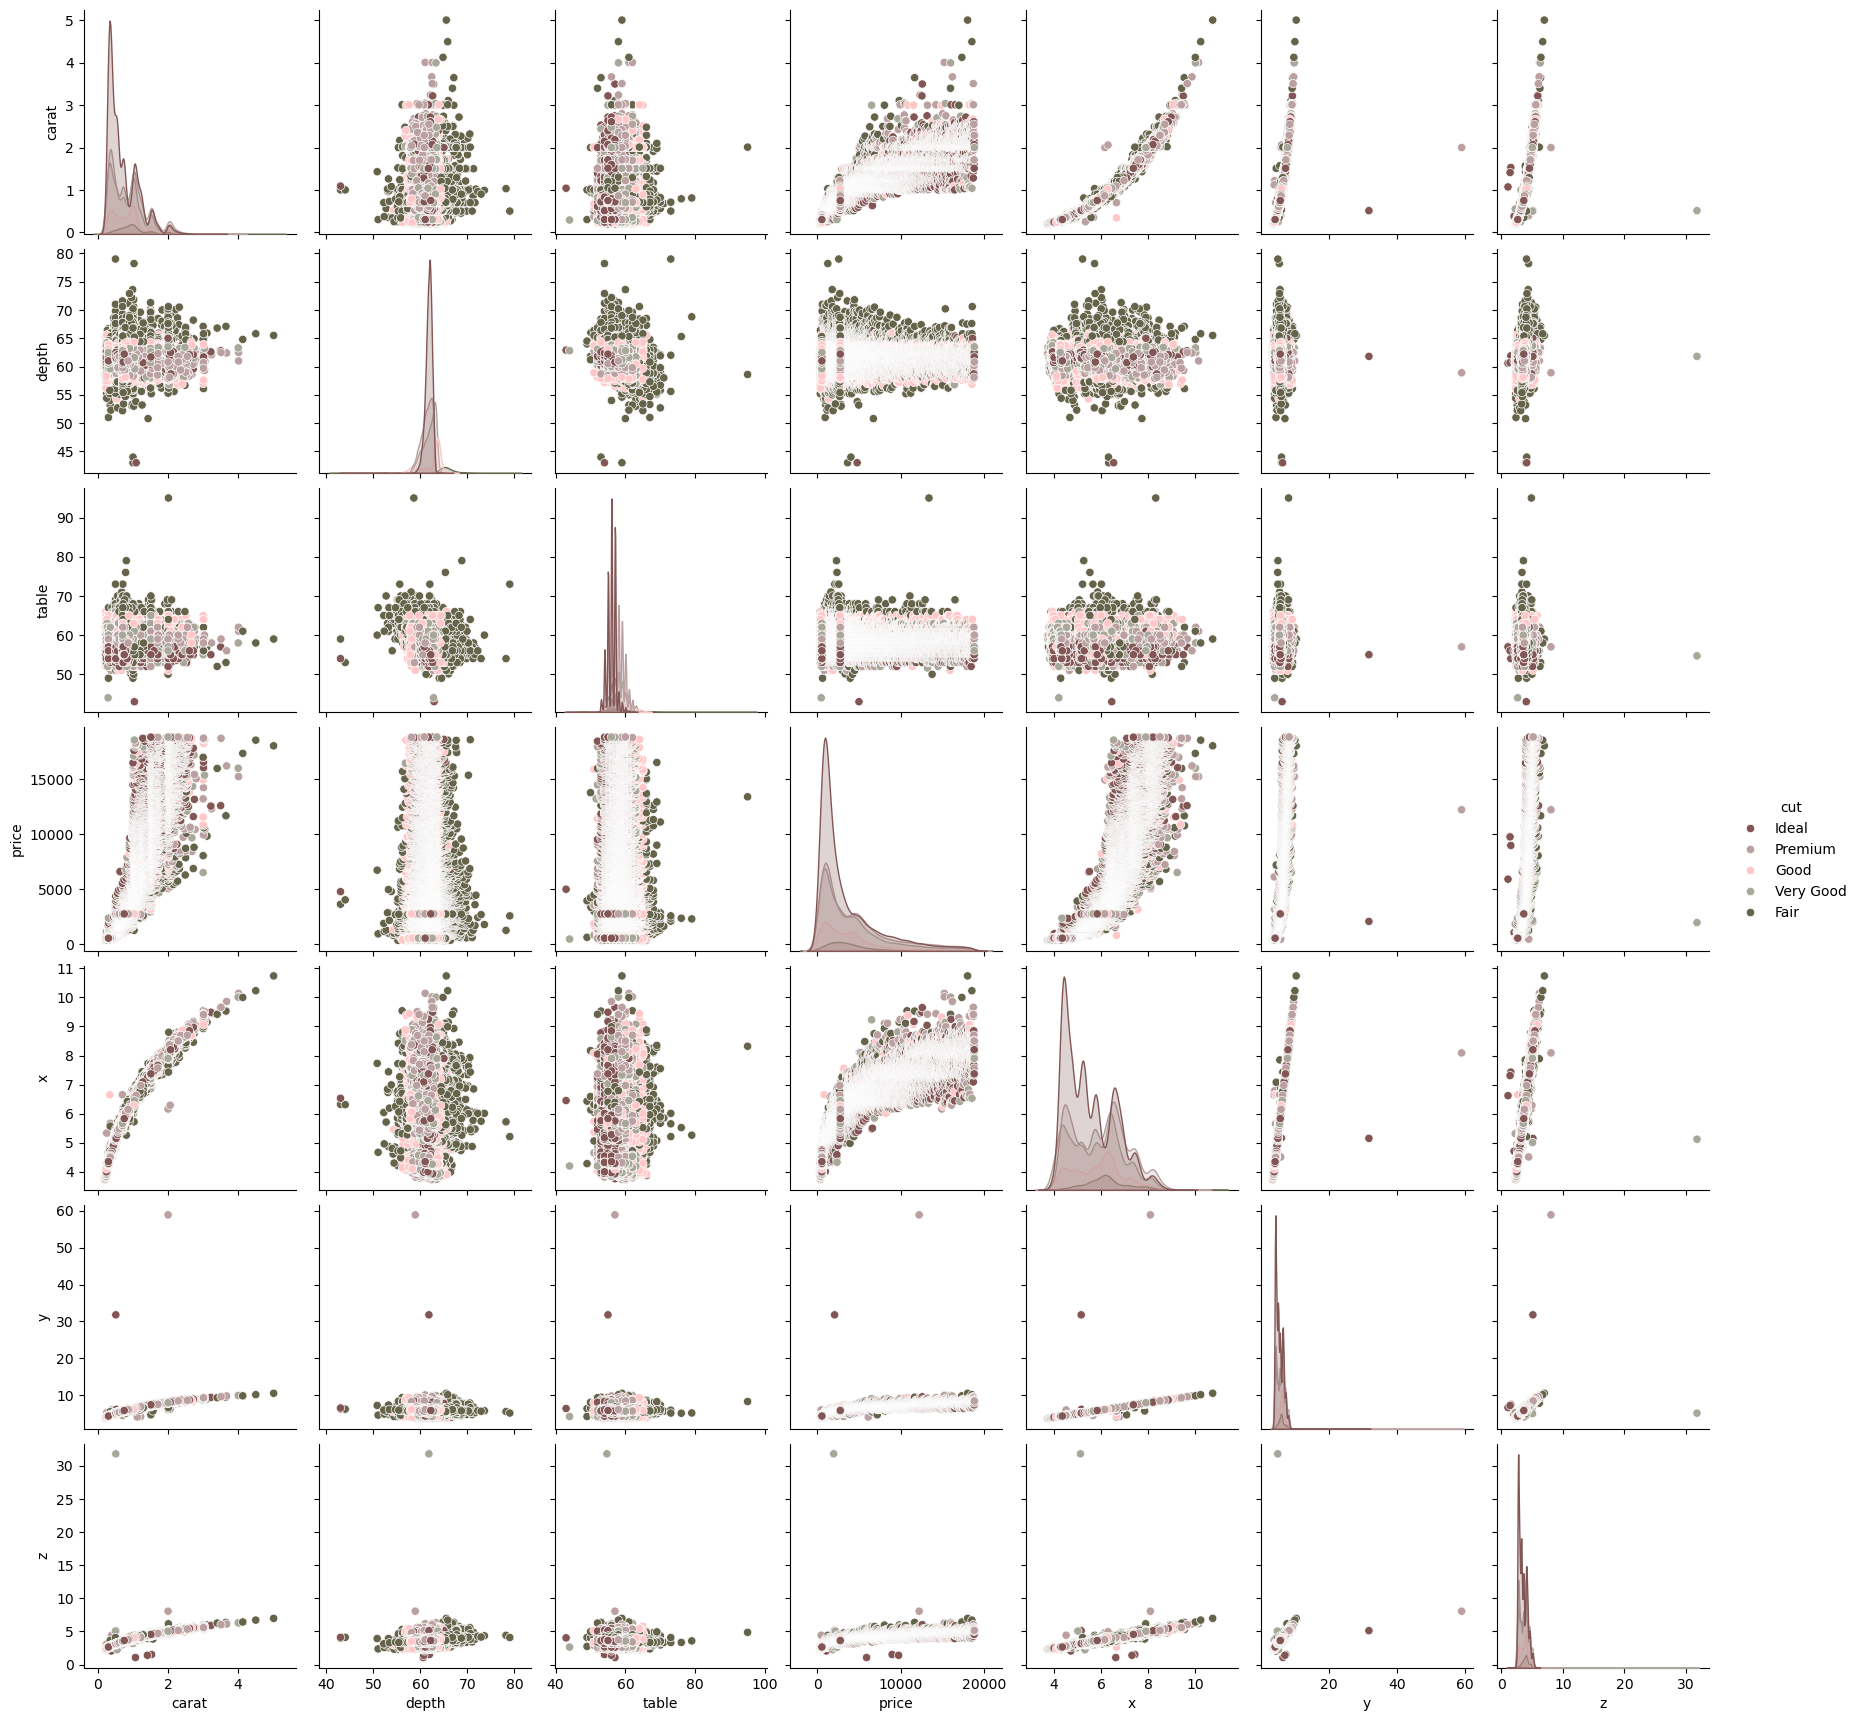

In [243]:
#Let's have a look at data
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df_Descriptive, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.

In [244]:
df_clean = df_clean[(df_clean["depth"]<75)&(df_clean["depth"]>45)]
df_clean = df_clean[(df_clean["table"]<80)&(df_clean["table"]>45)]
df_clean = df_clean[(df_clean["x"]<30)]
df_clean = df_clean[(df_clean["y"]<30)]
df_clean = df_clean[(df_clean["z"]<30)&(df_clean["z"]>2)]

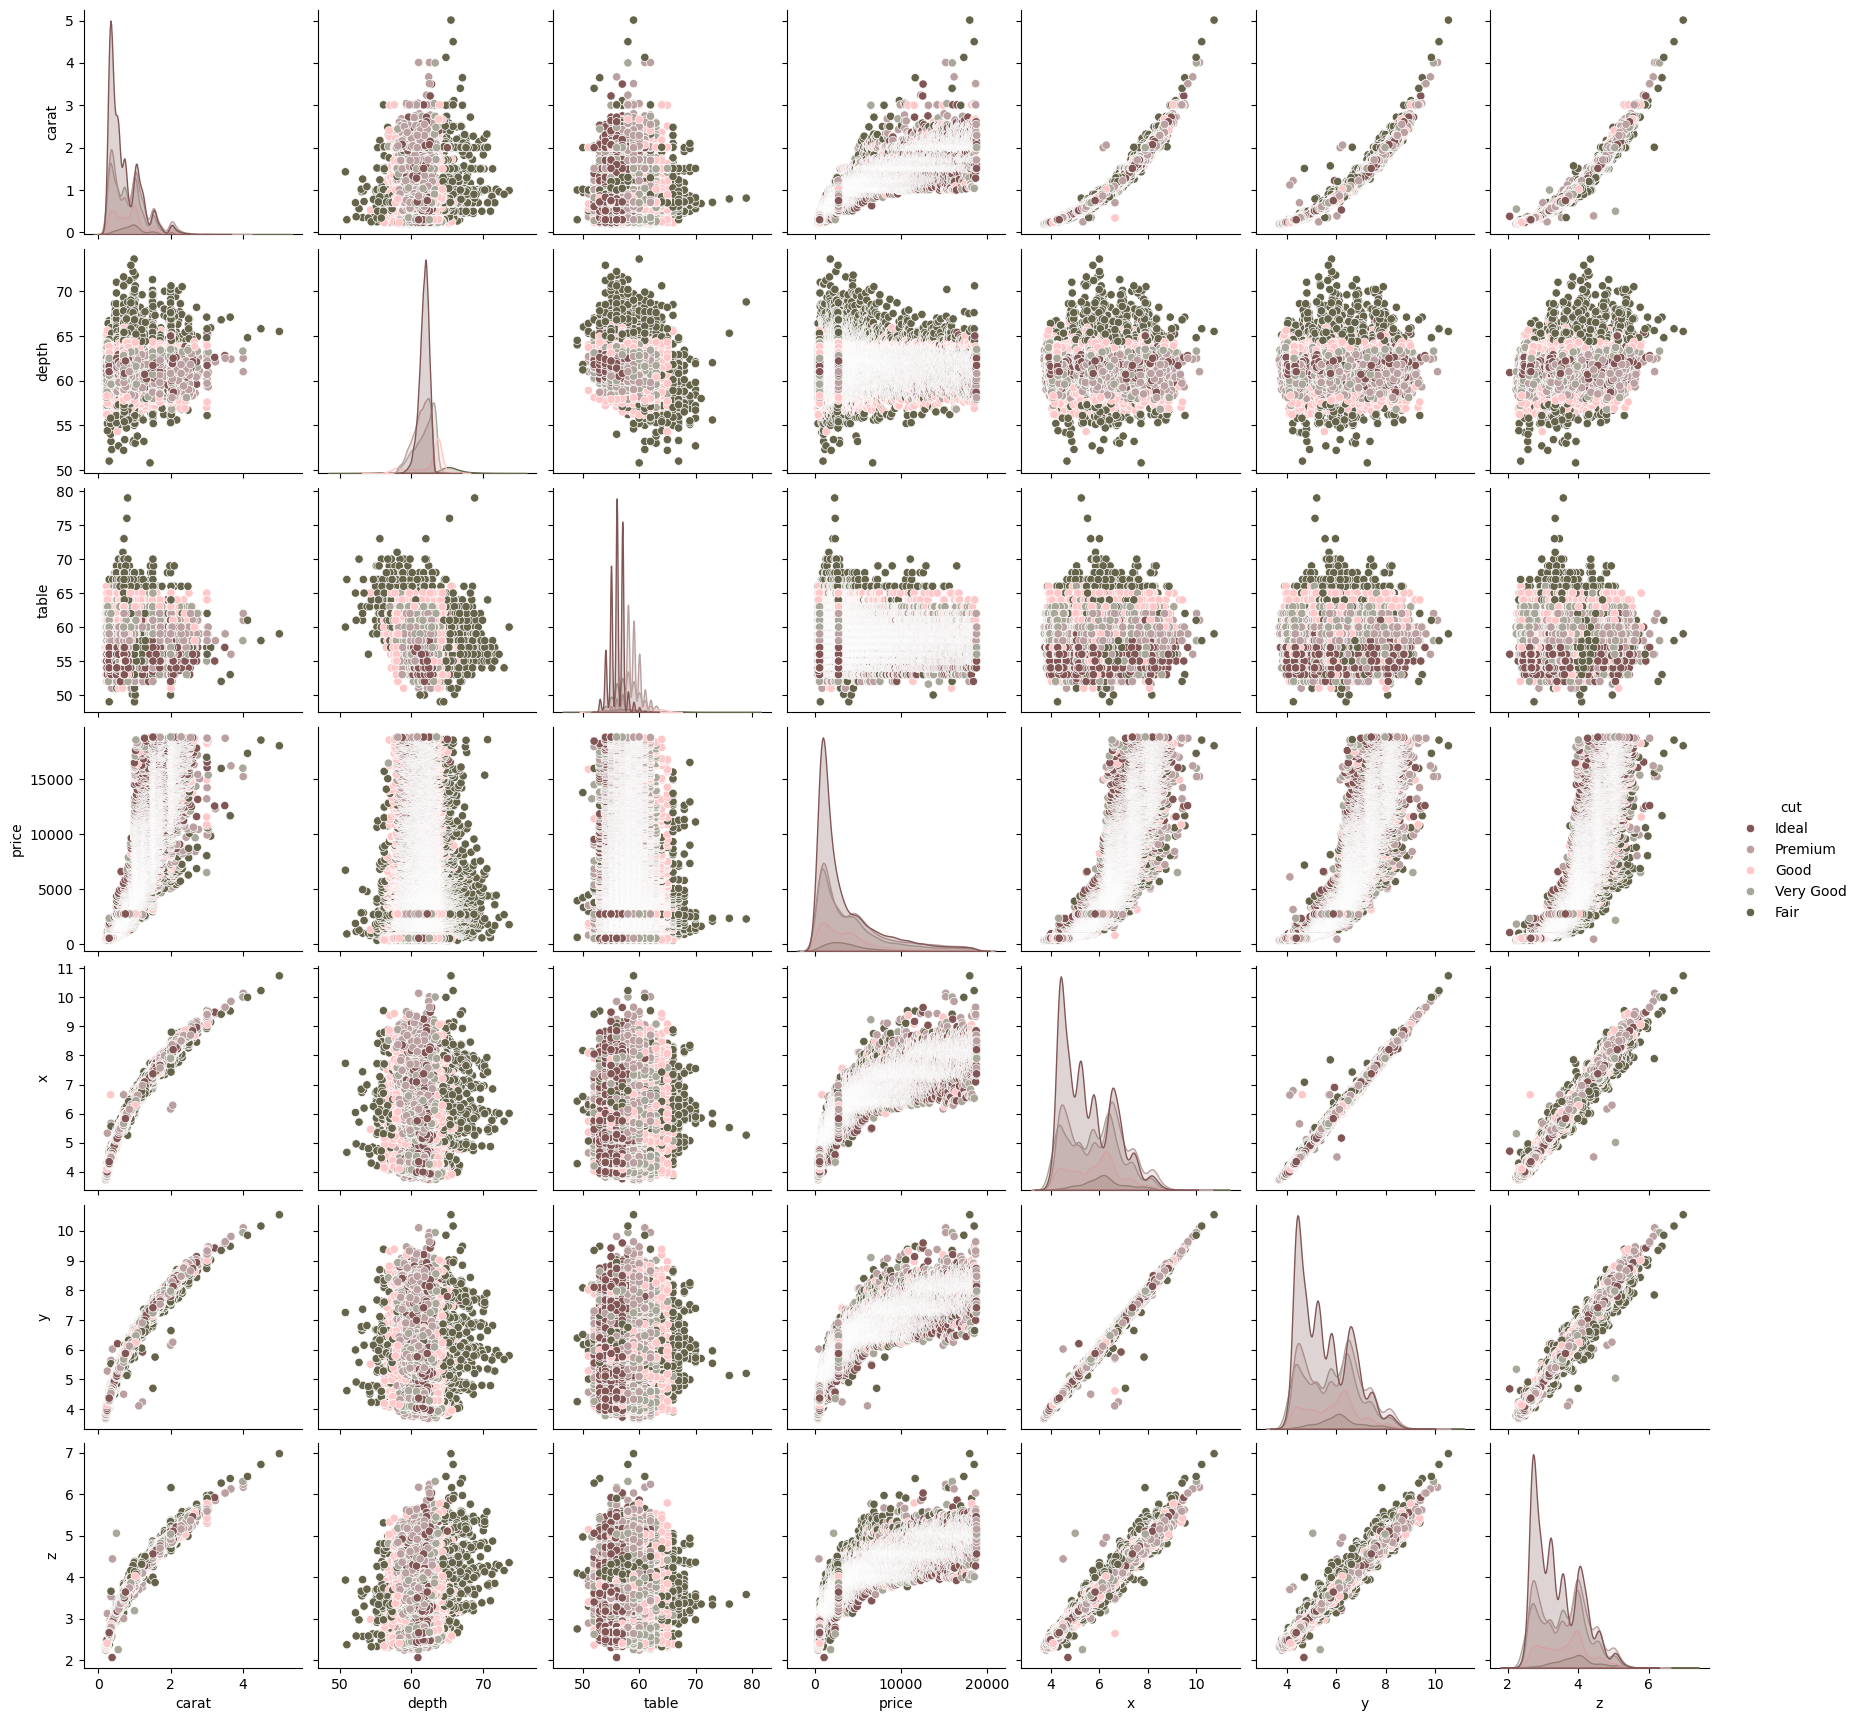

In [245]:
ax = sns.pairplot(df_clean, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.

In [246]:
for col in ["cut", "color", "clarity"]:
    print(f"Giá trị trong cột {col}:", df_clean[col].value_counts())

Giá trị trong cột cut: cut
Ideal        21479
Premium      13736
Very Good    12066
Good          4888
Fair          1592
Name: count, dtype: int64
Giá trị trong cột color: color
G    11252
E     9771
F     9515
H     8264
D     6754
I     5404
J     2801
Name: count, dtype: int64
Giá trị trong cột clarity: clarity
SI1     13026
VS2     12222
SI2      9141
VS1      8150
VVS2     5056
VVS1     3646
IF       1784
I1        736
Name: count, dtype: int64


In [247]:
# Xác định thứ tự
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Mã hóa thứ tự
encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])
df_clean[["cut", "color", "clarity"]] = encoder.fit_transform(df_clean[["cut", "color", "clarity"]])

In [248]:
df_clean.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [249]:
df_clean.head(10)

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0    326  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0    326  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0    327  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0    334  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0    335  4.34  4.35  2.75
5   0.24  2.0    0.0      5.0   62.8   57.0    336  3.94  3.96  2.48
6   0.24  2.0    1.0      6.0   62.3   57.0    336  3.95  3.98  2.47
7   0.26  2.0    2.0      2.0   61.9   55.0    337  4.07  4.11  2.53
8   0.22  0.0    5.0      3.0   65.1   61.0    337  3.87  3.78  2.49
9   0.23  2.0    2.0      4.0   59.4   61.0    338  4.00  4.05  2.39

<Axes: >

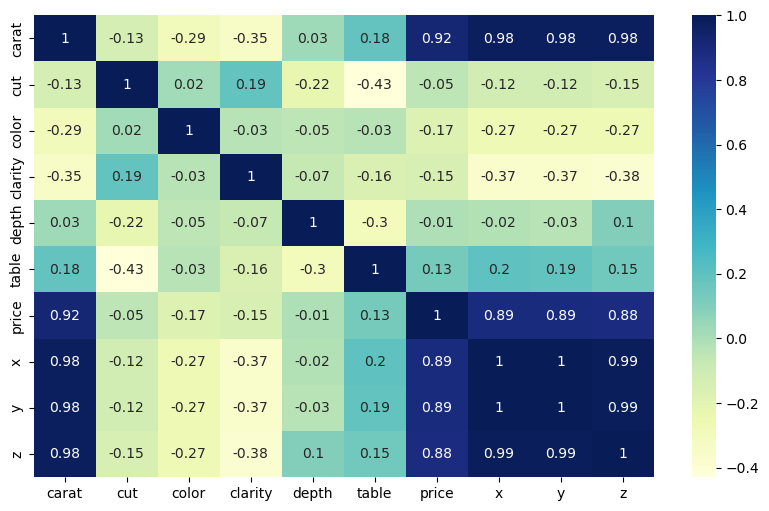

In [250]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_clean.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
# Biểu đồ tương quan giữa các cột (feature)

In [251]:
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
numerical_data = df_clean[numerical_columns]

In [252]:
# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Đưa dữ liệu đã chuẩn hóa vào DataFrame và giữ nguyên chỉ mục
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns, index=numerical_data.index)

# Kết hợp lại với các cột khác
df_new = pd.concat([df_clean.drop(columns=numerical_columns), scaled_df], axis=1)

# Hiển thị dữ liệu đã chuẩn hóa
print(df_new.head())

   cut  color  clarity  price     carat     depth     table         x  \
0  4.0    5.0      1.0    326 -1.199375 -0.175254 -1.104744 -1.592616   
1  3.0    5.0      2.0    326 -1.241647 -1.373023  1.592247 -1.646257   
2  1.0    5.0      4.0    327 -1.199375 -3.416274  3.390241 -1.503215   
3  3.0    1.0      3.0    334 -1.072561  0.458858  0.243751 -1.369112   
4  1.0    0.0      1.0    335 -1.030290  1.092971  0.243751 -1.243950   

          y         z  
0 -1.578907 -1.605761  
1 -1.704981 -1.779454  
2 -1.497860 -1.779454  
3 -1.353775 -1.316271  
4 -1.245712 -1.142578  


In [253]:
# Xác định biến đầu vào và đầu ra
X = df_new.drop("price", axis=1)
y = df_new["price"]

In [254]:
#Sử dụng `train_test_split` để chia dữ liệu thành các tập con kiểm tra và huấn luyện ngẫu nhiên.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
#Tỷ lệ 80% train, 20% test

In [255]:
# Our models performance holder
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = [] # Holds the models name
def display_model_performance(model_name, model, X_train = X_train, y_train = y_train,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, X_test = X_test,
                              y_test = y_test, cv = True):
    # Fit dataset in model
    model.fit(X_train, y_train)

    # Setup predictions
    y_prediction = model.predict(X_train)

    # Get models performance
    model_mse = mean_squared_error(y_train, y_prediction)
    model_rmse = np.sqrt(model_mse)

    # Cross validation
    cv_score = cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()

    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)

    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)

    print("--- Test Performance ---")

    # Setup test predictions
    y_test_prediction = model.predict(X_test)

    # Get models performance on test
    test_model_mse = mean_squared_error(y_test, y_test_prediction)
    test_model_rmse = np.sqrt(test_model_mse)
    print("RMSE: %.4f" %test_model_rmse)
    tests_rmse.append(test_model_rmse)

    # Tests accuracy
    test_accuracy = round(model.score(X_test, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)

    models.append(model_name)

    plt.figure(figsize=(6, 6))  # Tiny figure size
    plt.scatter(y_train, model.predict(X_train), s=1)  # Smaller points
    plt.xlabel("Actual", fontsize=6)
    plt.ylabel("Predicted", fontsize=6)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Test set plot
    print("------- Test -------")
    plt.figure(figsize=(6, 6))  # Tiny figure size
    plt.scatter(y_test, model.predict(X_test), s=1)  # Smaller points
    plt.xlabel("Actual", fontsize=6)
    plt.ylabel("Predicted", fontsize=6)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.plot(x_lim, y_lim, "k--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

RMSE: 1202.7812
CV-RMSE: 1203.3207
--- Test Performance ---
RMSE: 1216.0717
Accuracy: 90.72%


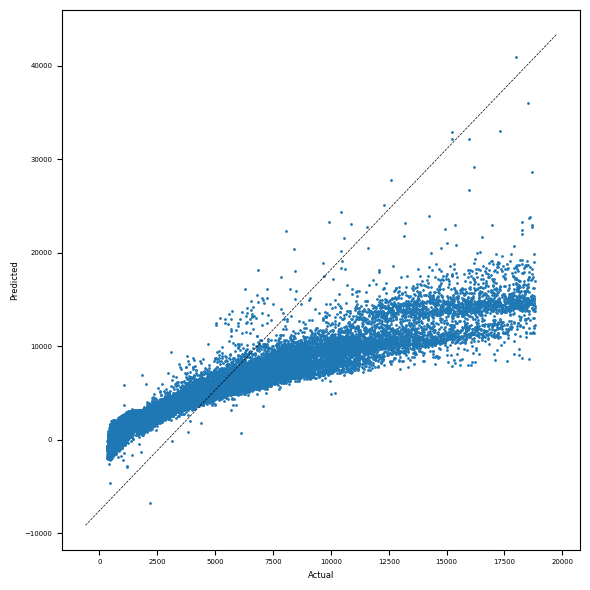

------- Test -------


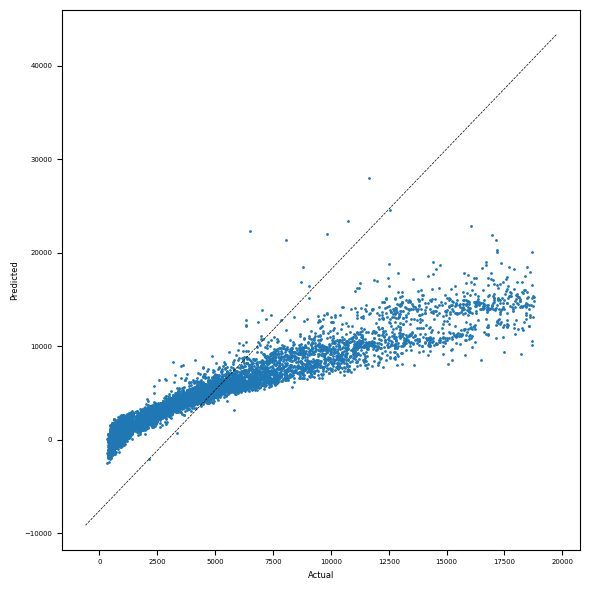

In [256]:
lin_reg = LinearRegression()
display_model_performance("Linear Regression", lin_reg)

RMSE: 6.6991
CV-RMSE: 734.0594
--- Test Performance ---
RMSE: 735.5093
Accuracy: 96.61%


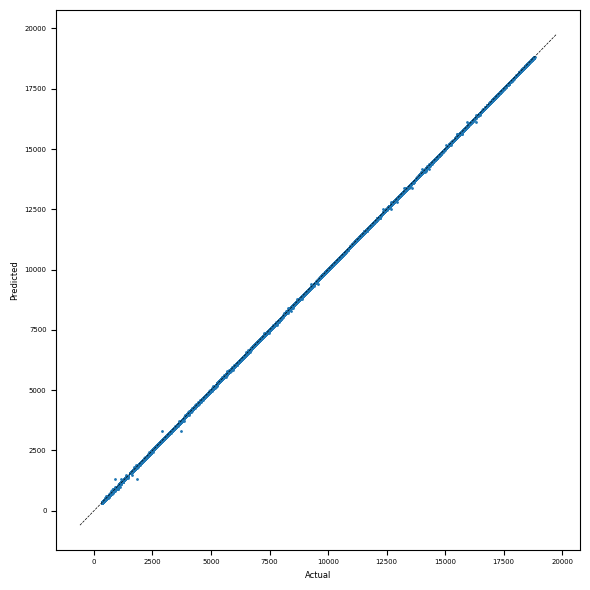

------- Test -------


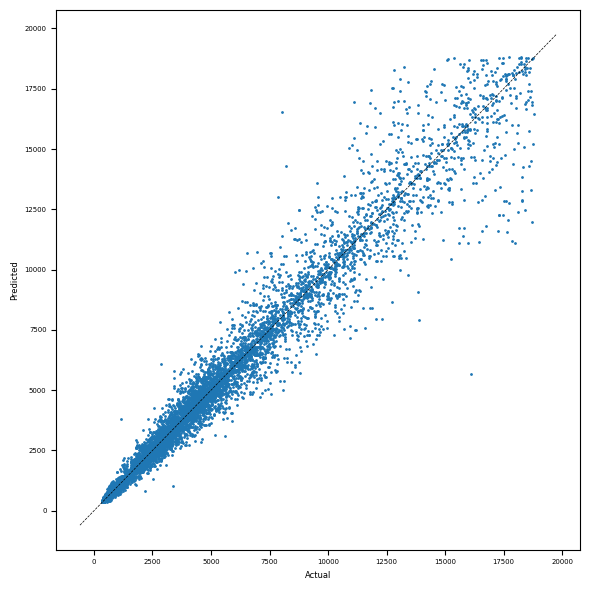

In [257]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state = 42)
display_model_performance("Decision Tree Regression", tree_reg)

RMSE: 238.0483
CV-RMSE: 563.3283
--- Test Performance ---
RMSE: 565.1814
Accuracy: 98.0%


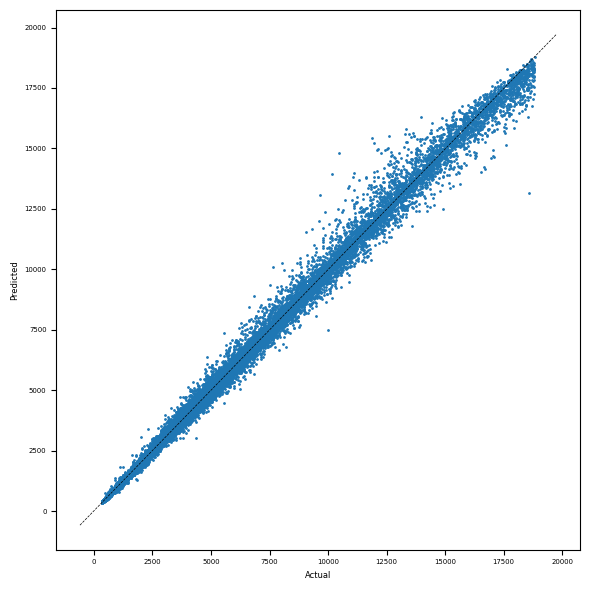

------- Test -------


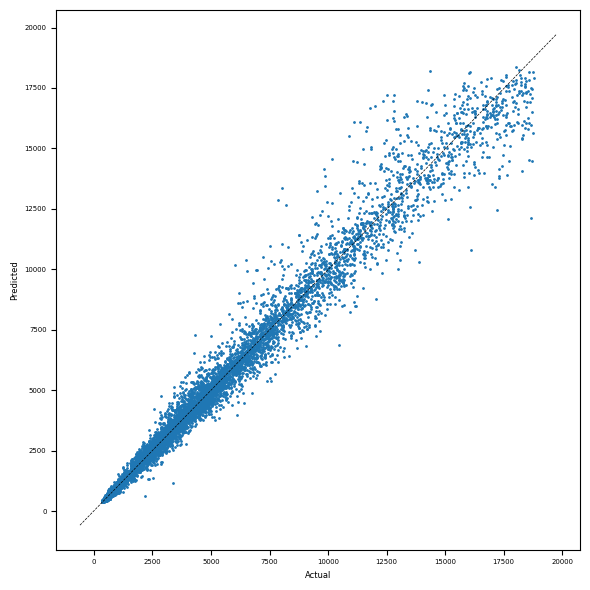

In [258]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
display_model_performance("Random Forest Regression", forest_reg)

RMSE: 386.4334
CV-RMSE: 541.8753
--- Test Performance ---
RMSE: 563.9064
Accuracy: 98.0%


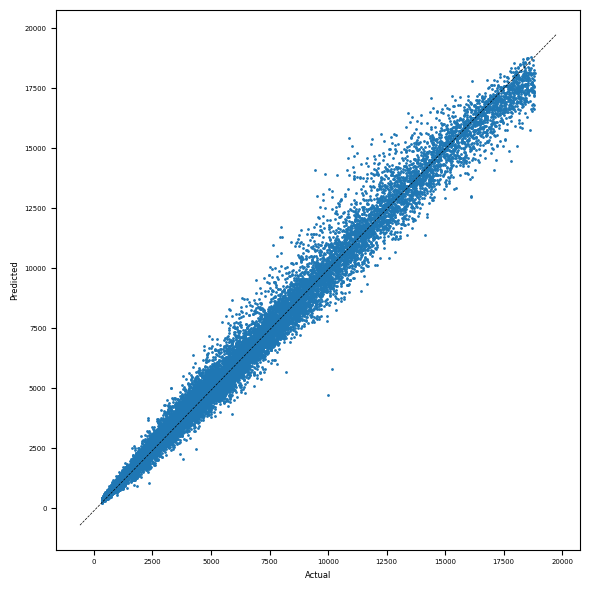

------- Test -------


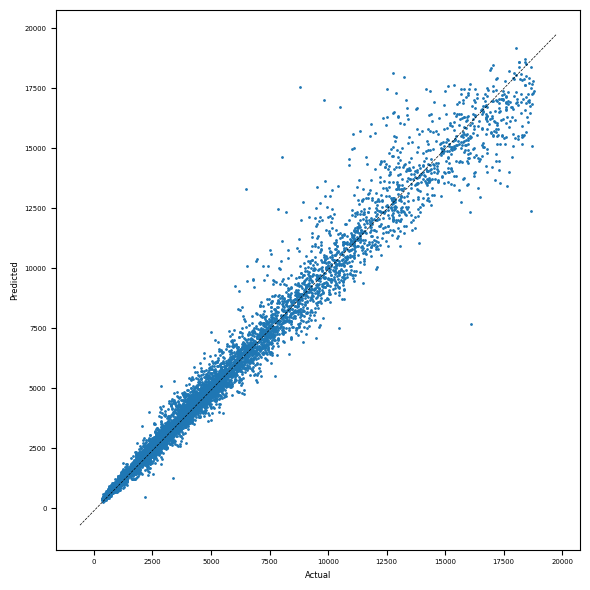

In [259]:
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
display_model_performance("XGBoost Regression", xgb_reg)